# **CIS 520: Machine Learning**

## **Regression Penalties**


- **Content Creators:** Yang Yan, Siyun Hu
- **Content Reviewers:** Lyle Ungar, Yide Zhao, Rohan Chhaya

- **Objective:** The objective of this notebook is to help you understand:
 
  - Differences between Lasso, Ridge and Elastic Net regressions.
  - How to implement above regressions in sklearn
  - Basic matplotlib skills for model visualization

In the Regression Penalties, we already see the differences between Linear regression with lasso and ridge regularization. We further explore Elastic Nets and stepwise/streamwise regression.


## **Data Preparation**

We first start with importing libraries we need and preparing the training, validation and test dataset. In this notebook, we fit different types of regression models on [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes).


In [1]:
%%capture
!pip install penngrader

In [2]:
# import libraries
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import sys

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error

In [3]:
# For autograder only, do not modify this cell. 
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


In [4]:
# import dataset
diabetes_X, diabetes_y = load_diabetes(return_X_y=True)

# Split the data into training/validation/testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.30, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=42)

print("The length of training dataset: "+ str(len(X_train)))
print("The length of validation dataset: "+ str(len(X_val)))
print("The length of test dataset: "+ str(len(X_test)))

The length of training dataset: 309
The length of validation dataset: 67
The length of test dataset: 66


In [5]:
diabetes_X.shape

(442, 10)

### Insert PennID Here!

In [6]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 57931095 # YOUR PENN-ID GOES HERE AS AN INTEGER#

In [7]:
import penngrader.grader

grader = penngrader.grader.PennGrader(homework_id = 'CIS_5200_202230_HW_Regression_Penalties_WS', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 57931095

Make sure this correct or we will not be able to store your grade


In [8]:
# A helper function for grading utils
def grader_serialize(obj):        # A helper function
    '''Dill serializes Python object into a UTF-8 string'''
    byte_serialized = dill.dumps(obj, recurse = True)
    return base64.b64encode(byte_serialized).decode("utf-8")

## **Lasso Regression**


Lasso regression is the linear regression with L1 regularization. 
One key characteristics of Lasso is that it will reduce some of the coefficients to zero i.e. some of the features are completely neglected, so that we could achieve feature selection.

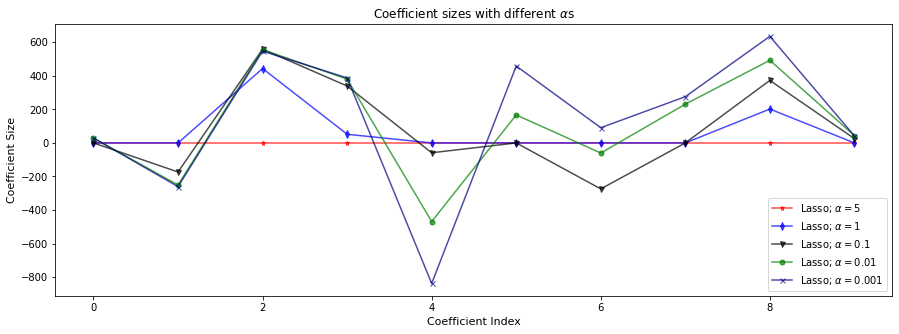

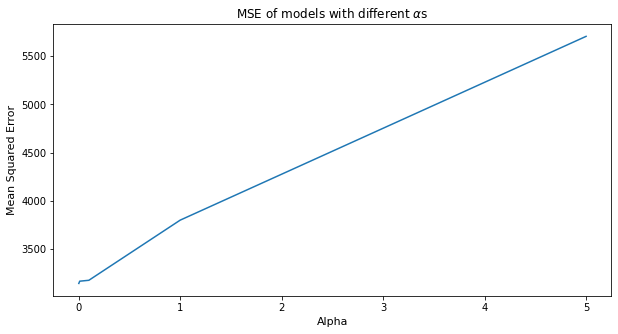

In [37]:
# test different alpha values
alphas = [5, 1, 0.1, 0.01, 0.001]
scores = []
models = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10e5)
    lasso.fit(X_train, y_train)
    models.append(lasso)
    y_pred = lasso.predict(X_val)
    val_score = mean_squared_error(y_val,y_pred)
    scores.append(val_score)

# visualize the coefficients of Lasso regression with different alpha values
markers_list = ['*', 'd', 'v', 'o', 'x']
color_list = ['red','blue','black','green','navy']

plt.rcParams["figure.figsize"] = (15,5)
for i in range(len(alphas)):
    plt.plot(range(10), models[i].coef_, alpha=0.7, marker=markers_list[i], markersize=5, color=color_list[i], label=r'Lasso; $\alpha = $'+str(alphas[i]),zorder=7)

plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Size',fontsize=11)
plt.legend(fontsize=10,loc=4)
plt.title(r"Coefficient sizes with different $\alpha$s")
plt.show()

# plot the validation score of Lasso regression with different alpha values
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(alphas, scores)
plt.xlabel('Alpha',fontsize=11)
plt.ylabel('Mean Squared Error',fontsize=11)
plt.title(r"MSE of models with different $\alpha$s")
plt.show()

In [38]:
print(scores[4])

3143.6968795259977


## *Question 1*

See the above figures, describe your findings and answer the following questions:


In [10]:
#When we increase alpha, what happened to the coefficients of Lasso regressions? Answer "increased" or "decreased"
effect_on_coeff_lasso = 'decreased'

grader.grade(test_case_id='test_case_effect_on_coeff_lasso', answer=effect_on_coeff_lasso)



Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [12]:
#When we increase alpha, what happened to the model performance on the validation set? Answer "improved" or "worsened" 
effect_on_model_lasso = 'worsened'
#Why?
effect_on_model_lasso_why = 'higher mean square error'
grader.grade(test_case_id='test_case_effect_on_model_lasso', answer=effect_on_model_lasso)
grader.grade(test_case_id='test_case_effect_on_model_lasso_why', answer=effect_on_model_lasso_why)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [13]:
#Among all Lasso regressions, which parameter will you choose?
best_lasso_model = 0.001
#Why?
best_lasso_model_why = 'lower alpha leads to better performance' 

grader.grade(test_case_id='test_case_best_lasso_model', answer=best_lasso_model)
grader.grade(test_case_id='test_case_best_lasso_model_why', answer=best_lasso_model_why)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [16]:
#Test your selected model on the test set by relacing None with the actual model in the function call. Report the mean squared error truncated to an integer.

def test_best_lasso_model(model): 
  if (model is None): return 0
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  return mse 


test_mse = int(test_best_lasso_model(models[4]))

grader.grade(test_case_id='test_case_mse_lasso_model', answer=test_mse)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Question 2*


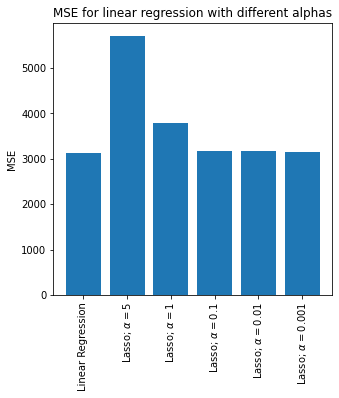

In [17]:
# fit linear regression model 
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)
lr_test_score=mean_squared_error(y_val,y_pred)

plt.rcParams["figure.figsize"] = (5,5)
plt.bar(range(6), (lr_test_score, scores[0], scores[1], scores[2], scores[3], scores[4]))
plt.title("MSE for linear regression with different alphas")
plt.ylabel("MSE")
plt.xticks(range(6), ('Linear Regression', r'Lasso; $\alpha =5$', r'Lasso; $\alpha = 1$', r'Lasso; $\alpha = 0.1$', r'Lasso; $\alpha = 0.01$', r'Lasso; $\alpha = 0.001$'), rotation='vertical')
plt.show()

In [19]:
#Compare the linear regression with your selected ideal Lasso regression. Are the coefficients for the lasso "larger" or "smaller" than plain linear regression 
linear_vs_lasso_param = 'smaller'

grader.grade(test_case_id='test_case_linear_lasso_params', answer=linear_vs_lasso_param)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [20]:
#Compare the linear regression with your selected ideal Lasso regression. Is the performance on the validation set for the lasso "better" or "worse" than plain linear regression 
linear_vs_lasso_score = 'worse'

grader.grade(test_case_id='test_case_linear_lasso_perf', answer=linear_vs_lasso_score)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Question 3*

See the below code and figures, describe your findings and answer the following questions:

- when we increase alpha, what happened to the coefficients of Ridge regressions? (Notice that linear regression is ridge regression with alpha equals to 0.)
- when we increase alpha, what happened to the model performance? Why?
- Among all Ridge regressions, which one will you choose? Test your selected model on the test set. What happened?

## **Ridge Regression**

Ridge regression is the linear regression with L2 regularization term. We already know that ridge regression is exactly MAP. However, we still need to explore the influence of regularization term on the coefficients.

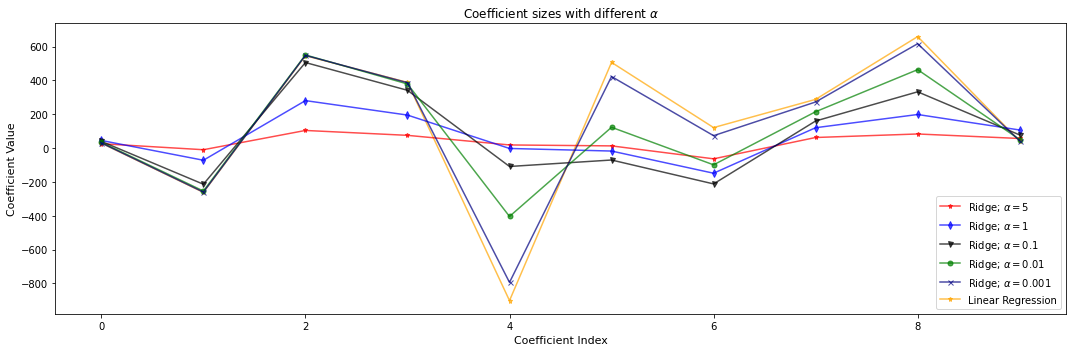

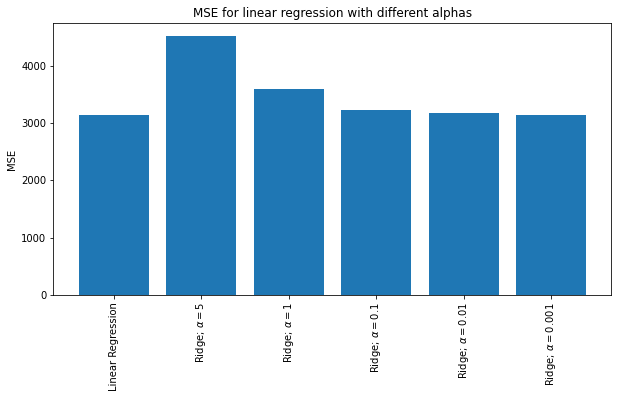

In [35]:
# test different alpha values
alphas = [5, 1, 0.1, 0.01, 0.001]
scores = []
models = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10e5)
    ridge.fit(X_train, y_train)
    models.append(ridge)
    y_pred = ridge.predict(X_val)
    val_score = mean_squared_error(y_val,y_pred)
    scores.append(val_score)

plt.rcParams["figure.figsize"] = (15,5)
for i in range(len(alphas)):
    plt.plot(range(10), models[i].coef_, alpha=0.7, marker=markers_list[i], markersize=5, color=color_list[i], label=r'Ridge; $\alpha = $'+str(alphas[i]),zorder=7)
plt.plot(range(10),lr.coef_,alpha=0.7,marker='*',markersize=5,color='orange',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Value',fontsize=11)
plt.title(r"Coefficient sizes with different $\alpha$")
plt.legend(fontsize=10,loc=4)
plt.tight_layout()
plt.show()




plt.rcParams["figure.figsize"] = (10,5)
plt.bar(range(6), (lr_test_score, scores[0], scores[1], scores[2], scores[3], scores[4]))
plt.title("MSE for linear regression with different alphas")
plt.ylabel("MSE")
plt.xticks(range(6), ('Linear Regression', r'Ridge; $\alpha =5$', r'Ridge; $\alpha = 1$', r'Ridge; $\alpha = 0.1$', r'Ridge; $\alpha = 0.01$', r'Ridge; $\alpha = 0.001$'), rotation='vertical')
plt.show()


In [36]:
print(scores[4])

3147.088885171289


In [22]:
# When we increase alpha, what happened to the coefficients of Ridge regressions? Answer "increased" or "decreased"
effect_on_coeff_ridge = 'decreased'

grader.grade(test_case_id='test_case_effect_on_coeff_ridge', answer=effect_on_coeff_ridge)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [23]:
# When we increase alpha, what happened to the model performance on the validation set? Answer "improved" or "worsened" 
effect_on_model_ridge = 'worsened' 

grader.grade(test_case_id='test_case_effect_on_model_ridge', answer=effect_on_model_ridge)


Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [26]:
# Among all Ridge regressions, which alpha value will you choose?
best_ridge_model = 0.001

grader.grade(test_case_id='test_case_best_ridge_model', answer=best_ridge_model)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [28]:
# Test your selected model on the test set by relacing None with the actual model in the function call. Report the mean squared error truncated to an integer.

def test_best_ridge_model(model): 
  if (model is None): return 0
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  return mse 


test_mse = int(test_best_ridge_model(models[4]))
grader.grade(test_case_id='test_case_mse_ridge_model', answer=test_mse)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Question 4*

We already know the differences between Ridge Regression with various alphas. However, what's the differences between Ridge and Lasso?

Compare the coeffecients and MSE of Lasso and Ridge Regressions. Describe your findings.

In [30]:
# Compare your selected ideal Ridge regression with your selected ideal Lasso regression. 

# Is the L2 norm of the coefficient array for the ideal lasso regression "larger" or "smaller" than that of the ideal ridge regression 
ridge_vs_lasso_param = 'larger'

grader.grade(test_case_id='test_case_ridge_lasso_params', answer=ridge_vs_lasso_param)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [39]:
# Based on previous questions, report a tuple of the mean squared validation errors (integer values) for the ideal lasso 
# and ideal ridge, with the lasso value first

ridge_vs_lasso_mse = (3143, 3147) #(ideal lasso, ideal ridge)
grader.grade(test_case_id='test_case_ridge_lasso_mse', answer=ridge_vs_lasso_mse)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## **Elastic Net**

Elastic Net is the combination of Lasso and Ridge Regression. It is linear regression with combined L1 and L2 priors as regularizer.

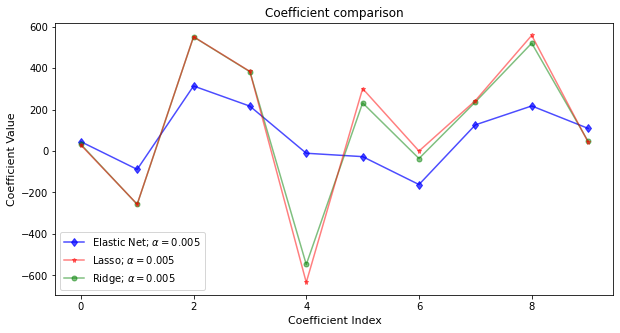

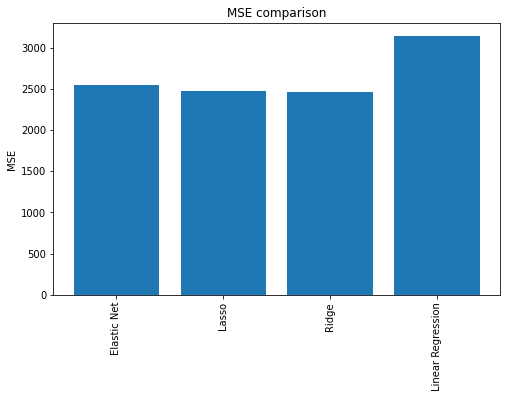

In [40]:
elastic = ElasticNet(alpha = 0.005, l1_ratio=0.5)
elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
elastic_mse = mean_squared_error(y_test,y_pred)

ridge = Ridge(alpha = 0.005)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
ridge_mse =mean_squared_error(y_test,y_pred)

lasso = Lasso(alpha = 0.005)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
lasso_mse =mean_squared_error(y_test,y_pred)

plt.plot(range(10),elastic.coef_,alpha=0.7,marker='d',markersize=6,color='blue',label=r'Elastic Net; $\alpha = 0.005$')
plt.plot(range(10),lasso.coef_,alpha=0.5,marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 0.005$',zorder=7)
plt.plot(range(10),ridge.coef_,alpha=0.5,marker='o',markersize=5,color='green',label=r'Ridge; $\alpha = 0.005$',zorder=2)
plt.legend()
plt.title("Coefficient comparison")
plt.xlabel('Coefficient Index',fontsize=11)
plt.ylabel('Coefficient Value',fontsize=11)
plt.show()


plt.rcParams["figure.figsize"] = (8,5)
plt.bar(range(4), (elastic_mse, lasso_mse, ridge_mse, lr_test_score))
plt.title("MSE comparison")
plt.ylabel("MSE")
plt.xticks(range(4), ('Elastic Net', r'Lasso', r'Ridge', 'Linear Regression'), rotation='vertical')
plt.show()

## *Question 5*

In the above graph, elastic net has a higher MSE than Ridge or Lasso. How can this be possible since it combines the two penalties?

Is it possible for you to find a better hyperparameter set that achieves performance which is at least as accurate as the best of Lasso and Ridge Regression?

*Hint: Here is the command you might want. You could use it to do CV easily.*

```python
from sklearn.linear_model import ElasticNetCV

elastic = ElasticNetCV(alpha = 0.005, l1_ratio=0.5)
```

Source: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

In [52]:
# Is it possible to achieve lower validation error than our pure lasso/ridge in our current situation?
# Answer "Yes" or "No" with an explanation why

elastic_net_mse = 'No, as each model performs well on the dataset independently but when combined the averaging effect negates that which makes the model efficient in the first place.'

In [53]:
grader.grade(test_case_id='test_case_elastic_net', answer=elastic_net_mse)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Question 6* 

In [55]:
# Based on the above article, which method, "lasso" or "ridge", will you use if you want to do feature selection?
best_method_feature_selection = 'lasso'

grader.grade(test_case_id='test_case_feature_selection', answer=best_method_feature_selection)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [56]:
# There are ten features in our dataset. If you run streamwise linear regression on our current data, what feature do you expect would be added first? Enter the index below
first_feature = 1

grader.grade(test_case_id='test_case_first_feature', answer=first_feature)

Correct! You earned 1.0/1.0 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## *Bonus Question*  

How will test accuracies of each of the different methods change if you add a new set of noise features: 10 times as many new features as you had before, and these features are not correlated with the outcome y?

In [57]:
bonus_ans = ''